In [252]:
#Bibliotecas
import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms.bipartite.generators import complete_bipartite_graph
#Biblioteca para tratar intercalação e permutação, além da escolha aleatória
import itertools
from collections import defaultdict
from networkx.utils import arbitrary_element

Alunos: Eduardo, Vitor, Daniel e Ricardo.

MIA: Análise de Dados em Grafos - PG-0083-23-X501

In [190]:
#Importando o Dataset
df_dados = pd.read_csv('ppgia_coautoria-bipartite.csv', delimiter=';', error_bad_lines=False, index_col=False, dtype='unicode')

#Definindo a ANO como indice
df_dados.set_index('ANO', inplace=True)

#Reduzindo o tamanho dos labels para que a plotagem fique nitida, tamanho 10, apenas para fins didádicos
for i in range(0, len(df_dados)):
    df_dados.iloc[i].TITULO = df_dados.iloc[i].TITULO[:10]
    df_dados.iloc[i].AUTORES = df_dados.iloc[i].AUTORES[:10]

#Exibir os dados
df_dados

,TITULO,AUTORES
ANO,,
1989,O Círculo,Plácido Ro
1990,Um Estudo,Plácido Ro
1990,Um Estudo,Humberto J
1991,Técnicas A,Plácido Ro
1991,Técnicas A,Adriana Ca
...,...,...
2021,Multi-Task,Xiaoqing W
2021,Multi-Task,Yanping Zh
2021,Multi-Task,Heye Zhang


In [235]:
#Numero total de valores nulos
df_dados.isnull().sum().sum() 

0

In [234]:
#Numero total de valores nulos por coluna
df_dados.isna().mean()

TITULO     0.0
AUTORES    0.0
dtype: float64

In [267]:
df_dados.shape

(2370, 2)

In [268]:
df_dados.dtypes

TITULO     object
AUTORES    object
dtype: object

In [191]:
#Filtrar apenas o ano de 2005, para reduzir o tamanho da entrada e melhorar a visualização, indexado pelo ano
df_dados_filtrado = df_dados.filter(like = '2005', axis=0)

#Exibir o dado filtrado
df_dados_filtrado

,TITULO,AUTORES
ANO,,
2005,Análise De,Heraldo Da
2005,Análise De,Patrick Vi
2005,Análise De,João Batis
2005,Enterprise,Mariano Mo
2005,Enterprise,Gleison
2005,Enterprise,Karina Vil
2005,Enterprise,Ana Regina
2005,Enterprise,Guilherme
2005,Enterprise,Savio Figu


In [192]:
#Criação dos nós a partir do dataframe
G = nx.from_pandas_edgelist(df_dados, 'TITULO', 'AUTORES')

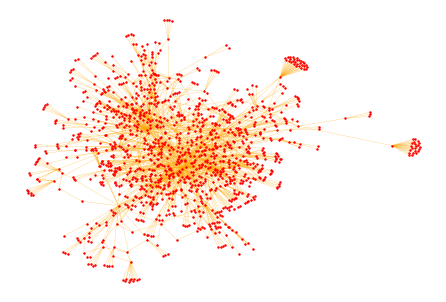

In [193]:
#Mostrar o Grafo sem os labels
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_color='red', node_size=2, edge_color='orange', width=0.2)

Grafo é Bipartido.
Grafo está Conectado.
Densidade: 0.01
Espectro: 1.0
Vertices Isolados: []
Diametro: 10
Coeficiente de Clustering: 0.0
Distância Média entre nós: {1: 10.729773462783172, 95: 5.968421052631579, 2: 12.9765625, 5: 20.225316455696202, 4: 19.448630136986303, 31: 5.709677419354839, 11: 15.28099173553719, 36: 5.777777777777778, 10: 14.6, 28: 5.214285714285714, 3: 14.560897435897436, 17: 13.705882352941176, 19: 10.210526315789474, 12: 10.483333333333333, 8: 15.955, 21: 8.952380952380953, 6: 19.074074074074073, 26: 6.3076923076923075, 14: 12.678571428571429, 9: 15.401234567901234, 25: 8.8, 7: 16.69047619047619, 13: 6.589743589743589, 133: 7.383458646616542, 24: 8.666666666666666, 15: 6.6, 18: 12.11111111111111, 43: 11.209302325581396, 23: 1.2173913043478262, 33: 6.454545454545454, 22: 9.363636363636363, 16: 18.4375, 32: 8.4375}


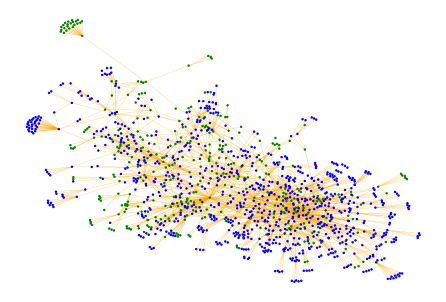

In [255]:
#Verifica se o grafo é bipartido
if nx.bipartite.is_bipartite(G):
    print('Grafo é Bipartido.')
    if nx.is_connected(G):
        print('Grafo está Conectado.')
        #Separar os dois conjuntos de vertices, verificação necessária porque se o Grafo não estiver conectado
        #Existirá mais de uma cor possível
        bottom_nodes, top_nodes = nx.bipartite.sets(G)
    else:
        top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
        bottom_nodes = set(G) - top_nodes
    
#Exibindo a densidade
print('Densidade:',round(nx.bipartite.density(G, bottom_nodes), 2))

#Exibindo o Espectro do Grafo Bipartido
print('Espectro:',nx.bipartite.spectral_bipartivity(G))

#Exibindo os vertices isolados
print('Vertices Isolados:',list(nx.isolates(G)))

#Exibindo o Diametro
print('Diametro:',nx.diameter(G))

#Exibindo o Coeficiente de Clustering
print('Coeficiente de Clustering:',nx.average_clustering(G))

#Exibindo a Distância entre nós
print('Distância Média entre nós:',nx.k_nearest_neighbors(G))
        
#Separar em cores
color_list = []
for v in bottom_nodes:
    color_list.append('green')
    G.nodes[v]['COR']= 'green'
for v in top_nodes:
    color_list.append('blue')
    G.nodes[v]['COR']= 'blue'

#Plotando o novo Grafo separando em cores o grafo bipartido
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_color = color_list, node_size=2, edge_color='orange', width=0.2)

In [260]:
#Os 10 Maiores Autores com Maior colaboração com outros autores
df_dados.groupby(['AUTORES']).TITULO.value_counts().nlargest(10)

AUTORES     TITULO    
Plácido Ro  Towards Th    11
Victor Hug  Automatic      8
            Evaluation     8
J M R S Ta  Evaluation     5
Plácido Ro  A Multi-Cr     5
Adriano Be  A Multi-Cr     4
Plácido Ro  A Hybrid M     4
            Applying A     4
            Applying V     4
Victor Hug  Intelligen     4
Name: TITULO, dtype: int64

In [256]:
#Os 10 Maiores Autores com artigos compartilhados
df_dados.AUTORES.value_counts().nlargest(10)

Victor Hug    174
Plácido Ro    144
Maria Eliz     41
Adriano Be     38
Maria Andr     38
Joel J P C     37
Joao Jose      37
André Luís     31
J M R S Ta     30
João Batis     28
Name: AUTORES, dtype: int64

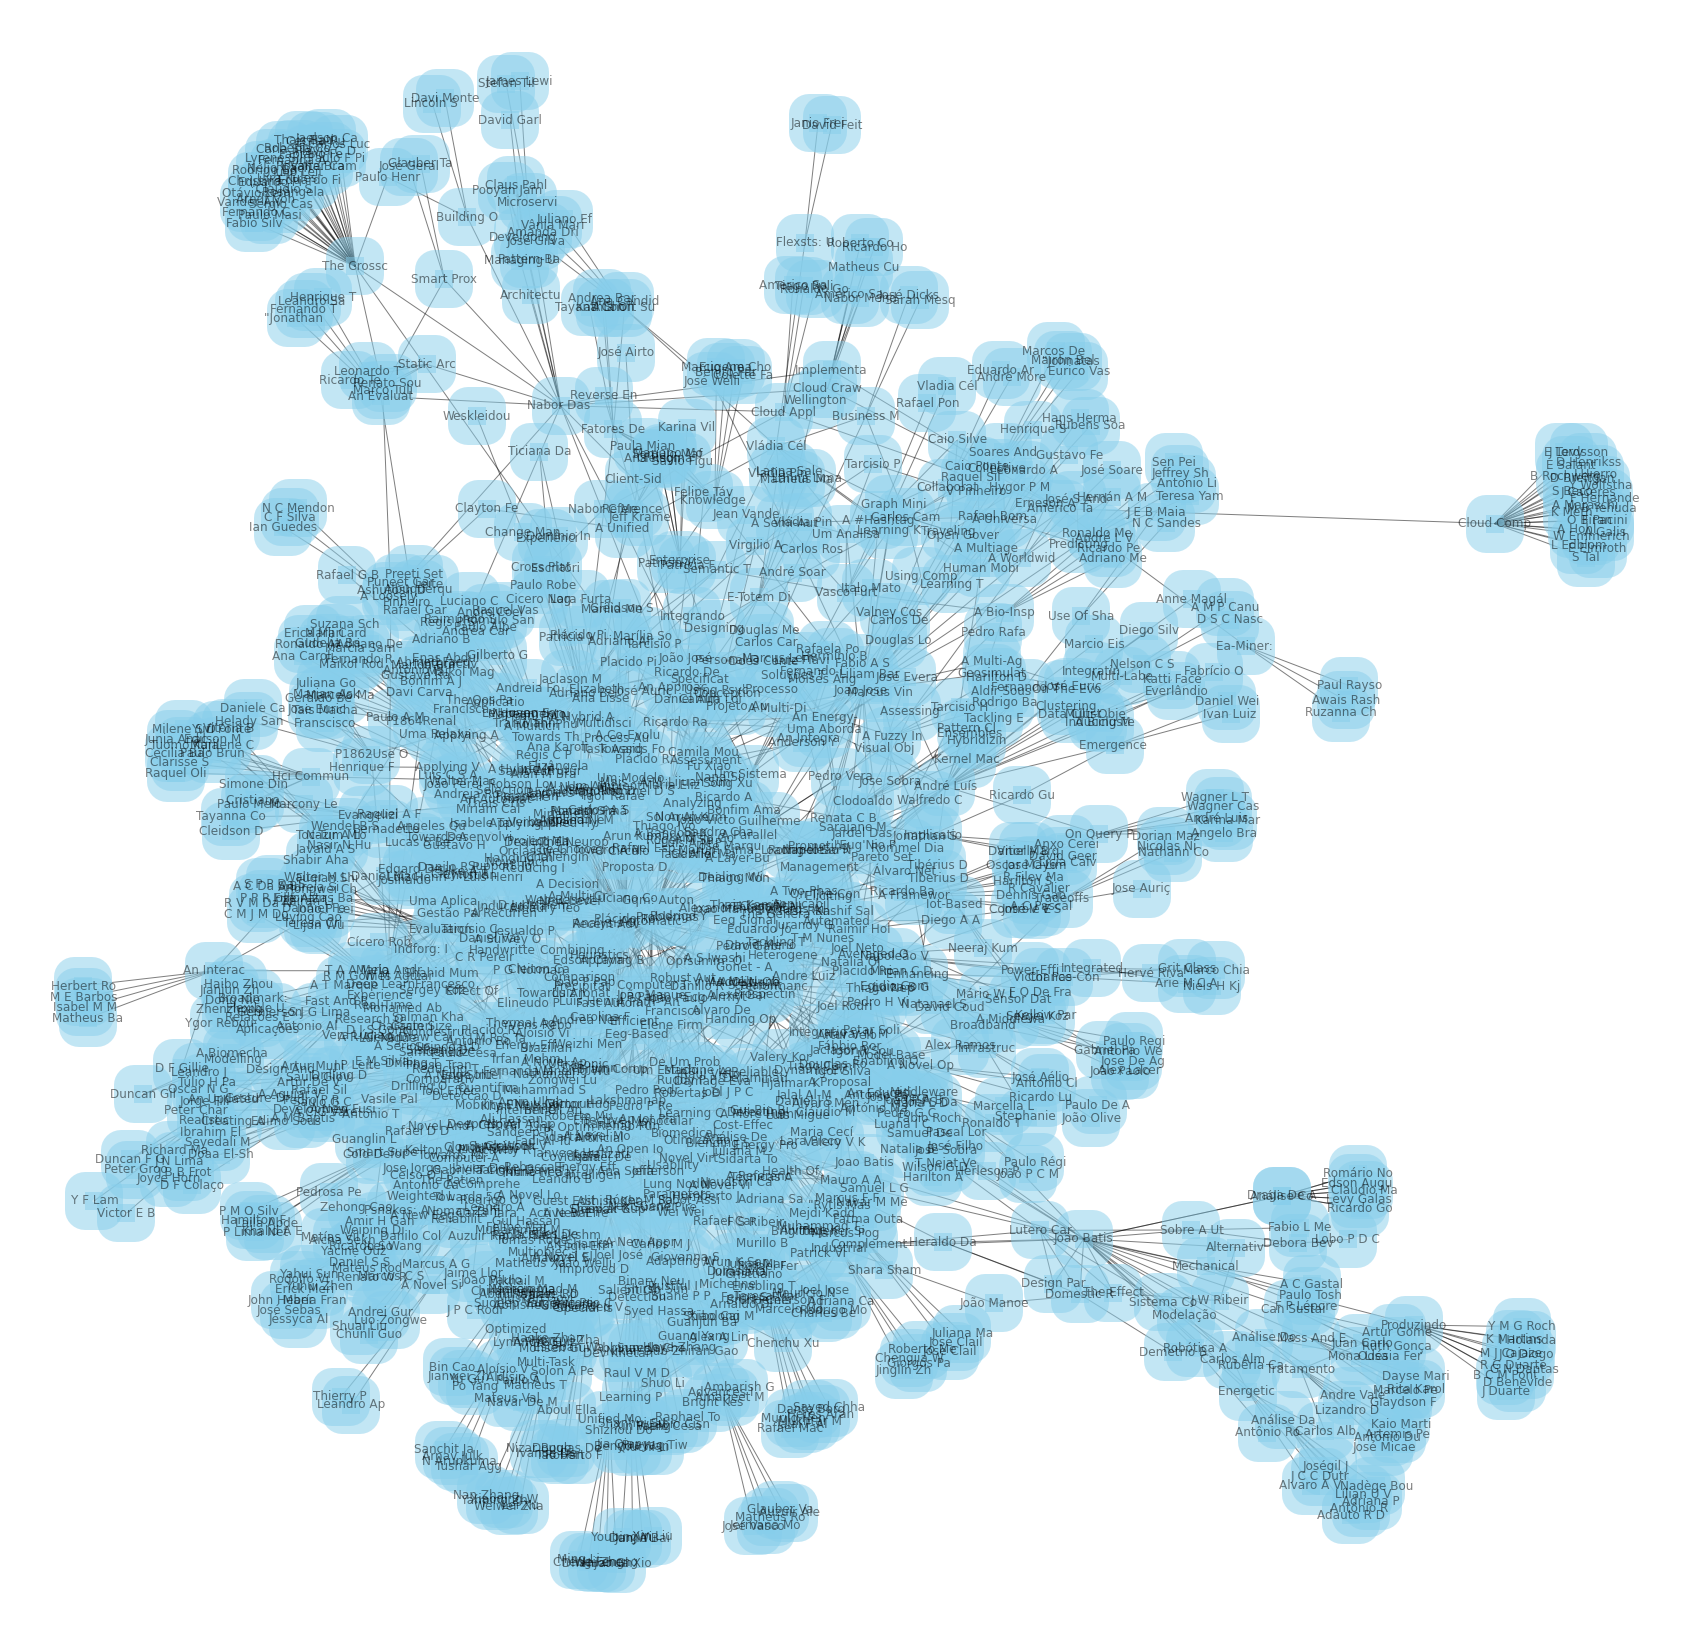

In [167]:
#Plotando um novo grafo tentando melhorar a visualização, agora com os labels com 10 de tamanho cada
fig, ax = plt.subplots(figsize=(30,30))
nx.draw(G, with_labels=True, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
plt.show()

Grafo é Bipartido.
Grafo está Conectado.
Densidade: -0.0
Espectro: 1.0


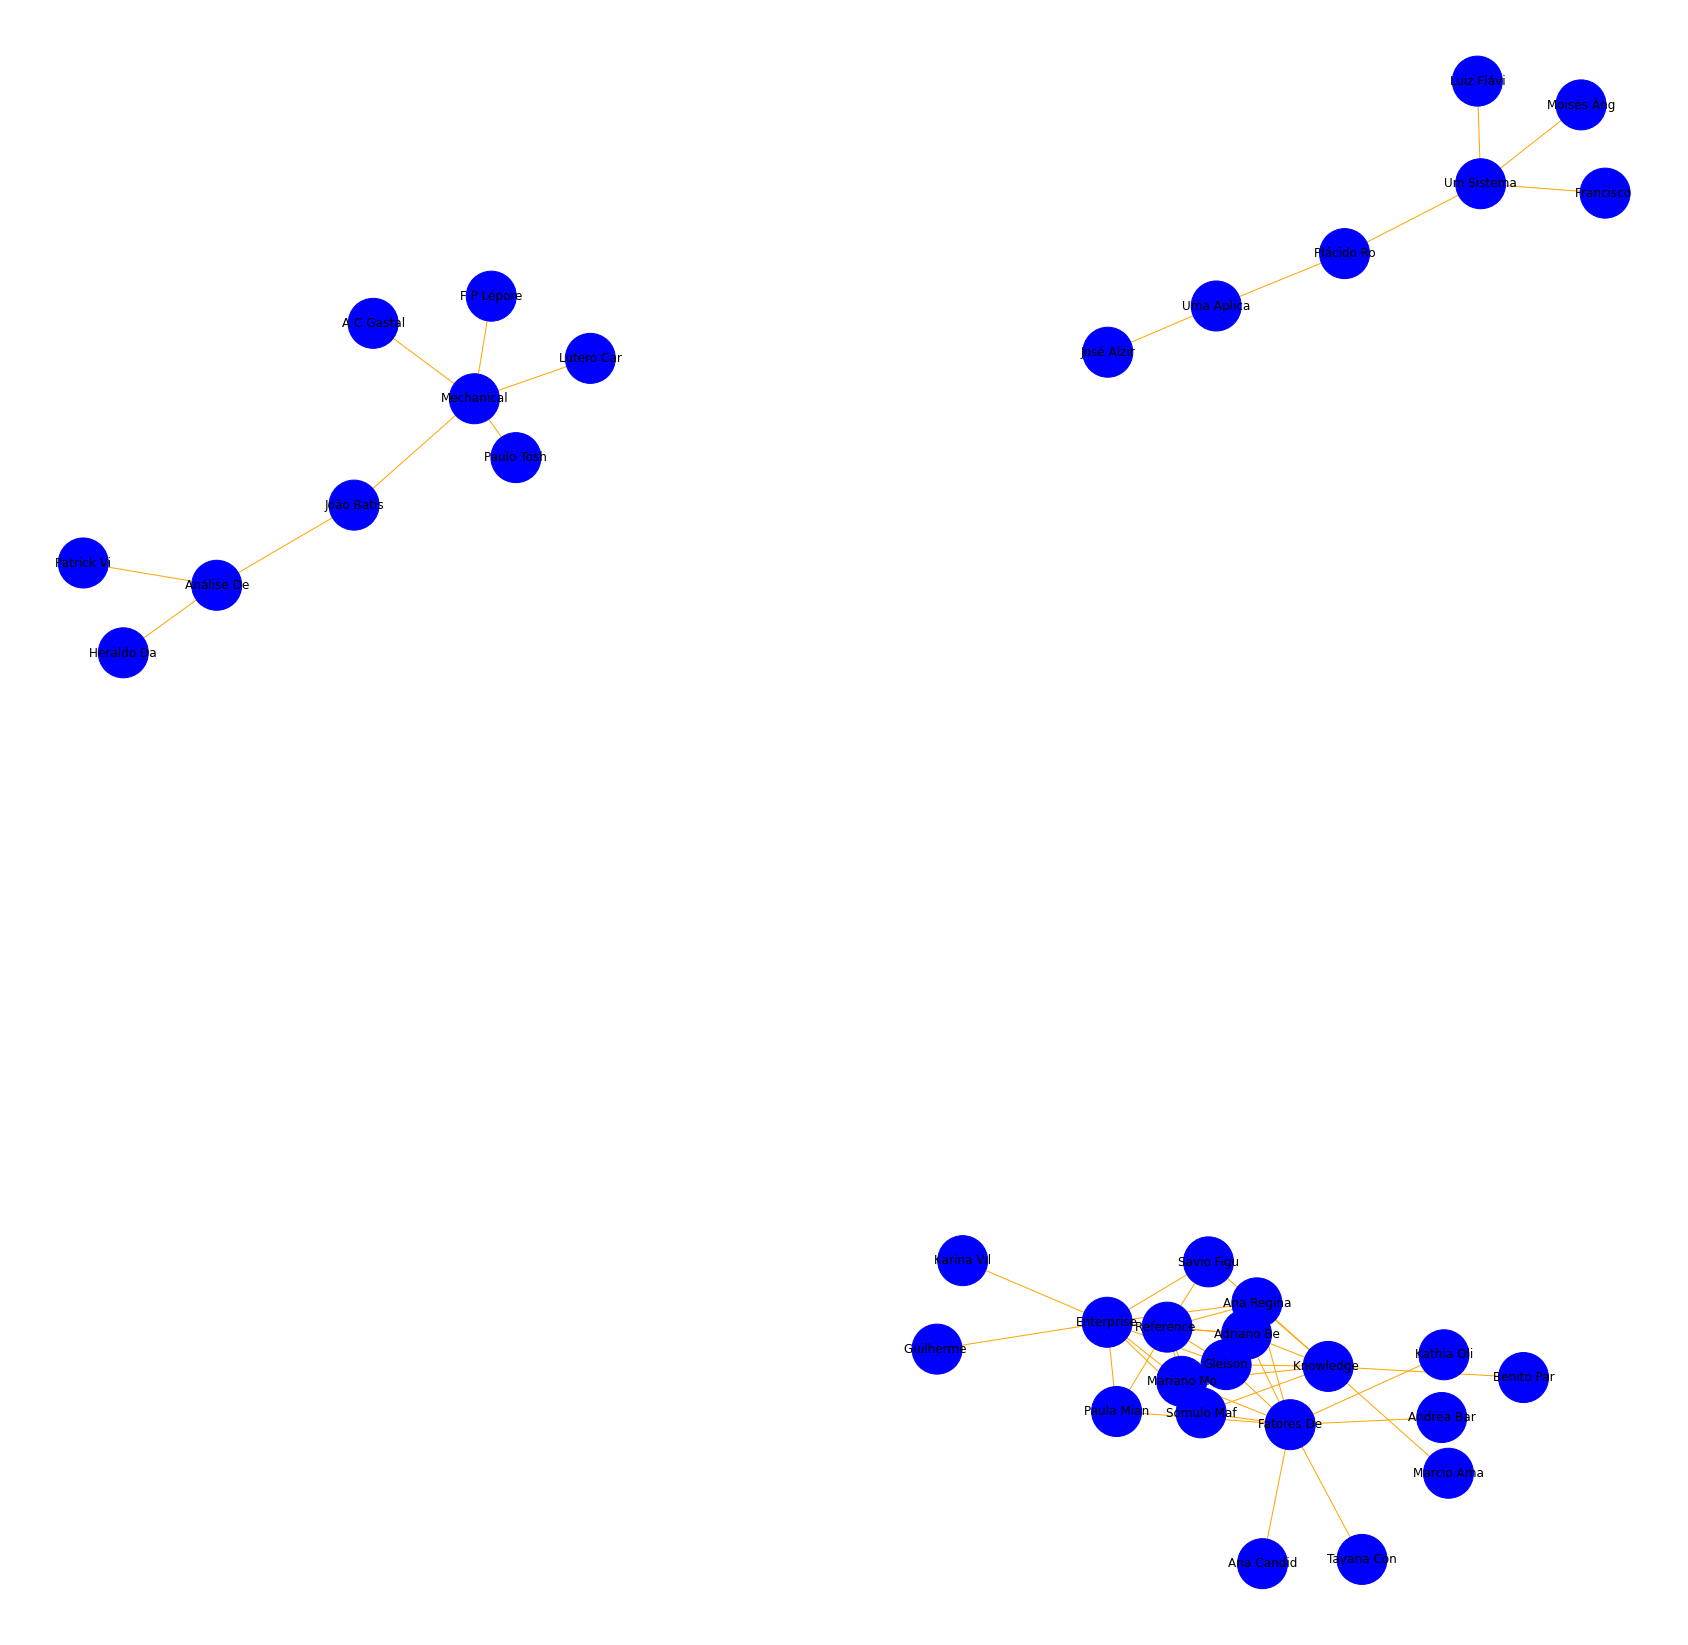

In [174]:
#Criando o grafo filtrado por ano = 2005, percebemos que gera uma densidade negativa, quando filtramos a entrada
G = nx.from_pandas_edgelist(df_dados_filtrado, 'TITULO', 'AUTORES')

#Verifica se o grafo é bipartido
if nx.bipartite.is_bipartite(G):
    print('Grafo é Bipartido.')
    if nx.is_connected(G):
        print('Grafo está Conectado.')
    else:
        print('Grafo está Conectado.')
else:
    print('Grafo é Monopartido.')

#Exibindo a densidade
print('Densidade:',round(nx.bipartite.density(G, bottom_nodes), 2))

#Exibindo o Espectro do Grafo Bipartido
print('Espectro:',nx.bipartite.spectral_bipartivity(G))
    
#Plotando o Grafo
colors = ["blue" for n in G.nodes(data=True)]
fig, ax = plt.subplots(figsize=(30,30))
node_size = [2500 for node in G.nodes]
nx.draw_networkx(G, node_size=node_size, node_color=colors, edge_color='orange')
plt.axis("off")
plt.show()

#### Representação da conversão de Grafo Bipartido para Monopartido ponderado

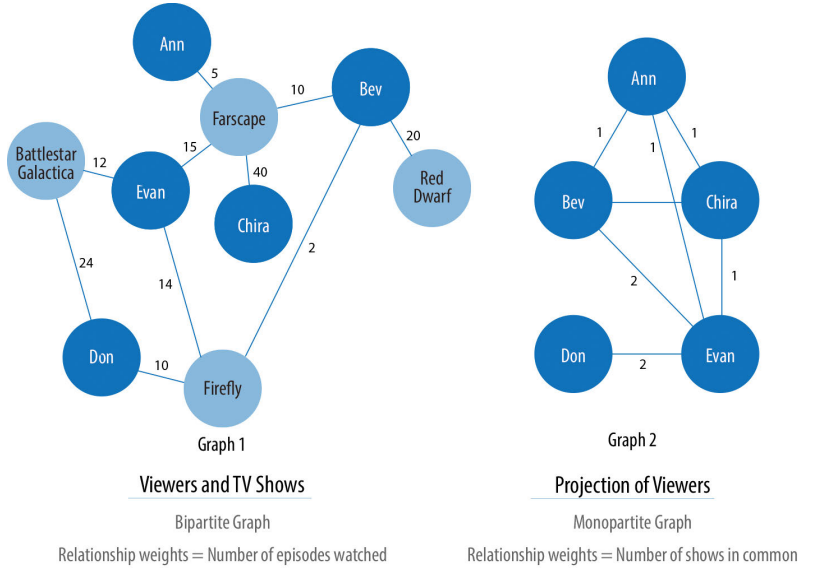

In [184]:
#Removendo os vertices que identicamos com o atributo COR, neste caso green para deixar os autores
to_remove = []
for node in G.nodes(data = True):
    if node[1]["COR"] == "green": ## check if the node is green
        to_remove.append(node[0])
        ## go over all neighbours of the node and add an edge between them
        neighbours =  list(G.neighbors(node[0]))
        for i in range(0, len(neighbours)-1):
            for j in range(i+1, len(neighbours)):
                G.add_edge(neighbours[i],neighbours[j])

## remove the green nodes
G.remove_nodes_from(to_remove)

Grafo é Monopartido.


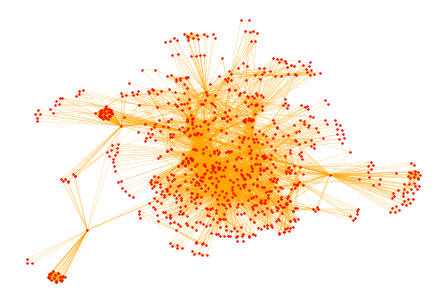

In [185]:
#Verifica se o grafo é bipartido
if nx.bipartite.is_bipartite(G):
    print('Grafo é Bipartido.')
    if nx.is_connected(G):
        print('Grafo está Conectado.')
        #Separar os dois conjuntos de vertices, verificação necessária porque se o Grafo não estiver conectado
        #Existirá mais de uma cor possível
        bottom_nodes, top_nodes = nx.bipartite.sets(G)
    else:
        top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
        bottom_nodes = set(G) - top_nodes
else:
    print('Grafo é Monopartido.')

    
#Plotando o novo Grafo
#Mostrar o Grafo sem os labels
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_color='red', node_size=2, edge_color='orange', width=0.2)

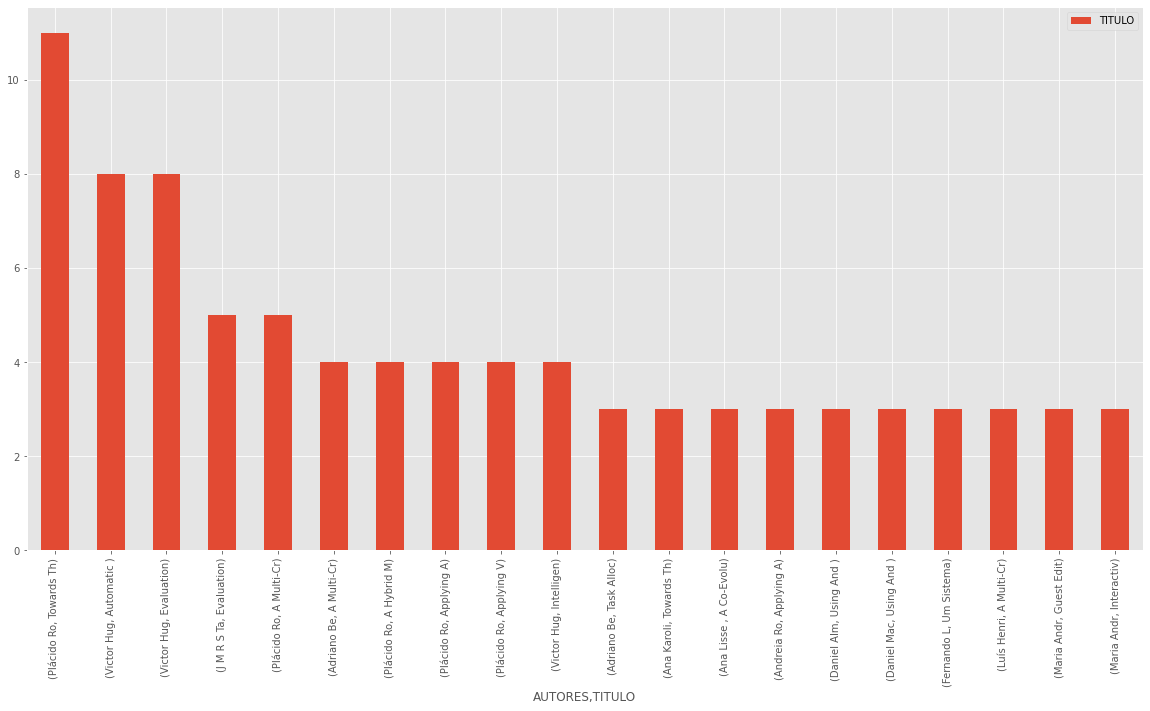

In [288]:
#Plotando um grafico de frequencia dos 10 maiores autores por titulos publicados
plt.figure(figsize=(20, 10))

df_dados.groupby(['AUTORES']).TITULO.value_counts().nlargest(20).plot.bar(legend=True)

plt.show()